### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import Dense, Input, Dropout, Lambda, Layer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import Birch
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam



### Loading data

In [2]:
df=pd.read_csv("dataset/Sybil_data.csv")

### Data Cleaning and Preprocessing

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class,num_learners
0,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.00,1.0,0.20,0.0,0.0,0.0,0.0,warezclient,15
1,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.00,1.0,0.18,0.0,0.0,0.0,0.0,warezclient,12
2,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.00,1.0,0.19,0.0,0.0,0.0,0.0,warezclient,11
3,15159,tcp,ftp,SF,350,1185,0,0,0,6,...,0.56,0.02,0.0,0.00,0.0,0.0,0.0,0.0,warezclient,2
4,4,tcp,ftp_data,SF,832,0,0,0,0,0,...,1.00,0.00,1.0,0.18,0.0,0.0,0.0,0.0,warezclient,12


In [4]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class,num_learners
58616,45,tcp,telnet,SF,268,2364,0,0,0,0,...,0.01,0.02,0.0,0.0,0.0,0.0,0.69,0.0,perl,6
58617,31,tcp,telnet,SF,137,1351,0,0,0,0,...,1.00,0.00,0.5,0.0,0.0,0.0,0.00,0.0,buffer_overflow,1
58618,127,tcp,telnet,SF,1567,2736,0,0,0,1,...,1.00,0.00,0.2,0.0,0.0,0.0,0.00,0.0,buffer_overflow,2
58619,0,tcp,ftp_data,SF,0,5020,0,0,0,0,...,1.00,0.00,1.0,0.0,0.0,0.0,0.00,0.0,buffer_overflow,10
58620,290,tcp,telnet,SF,415,70529,0,0,0,3,...,1.00,0.00,1.0,0.0,0.0,0.0,0.00,0.0,buffer_overflow,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58621 entries, 0 to 58620
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     58621 non-null  int64  
 1   protocol_type                58621 non-null  object 
 2   service                      58621 non-null  object 
 3   flag                         58621 non-null  object 
 4   src_bytes                    58621 non-null  int64  
 5   dst_bytes                    58621 non-null  int64  
 6   land                         58621 non-null  int64  
 7   wrong_fragment               58621 non-null  int64  
 8   urgent                       58621 non-null  int64  
 9   hot                          58621 non-null  int64  
 10  num_failed_logins            58621 non-null  int64  
 11  logged_in                    58621 non-null  int64  
 12  num_compromised              58621 non-null  int64  
 13  root_shell      

In [6]:
df.shape

(58621, 43)

In [7]:
df.size

2520703

In [8]:
df.ndim

2

In [9]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_hot_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_class', 'num_learners'],
      dtype='object')

In [10]:
df['flag'].value_counts()

flag
S0        34497
SF        11543
REJ        8540
RSTR       2275
RSTO       1343
SH          269
RSTOS0      103
OTH          35
S2            8
S1            4
S3            4
Name: count, dtype: int64

In [11]:
df['num_failed_logins'].value_counts()

num_failed_logins
0    58567
1       52
5        1
4        1
Name: count, dtype: int64

In [12]:
df['logged_in'].value_counts()

logged_in
0    56634
1     1987
Name: count, dtype: int64

In [13]:
df['root_shell'].value_counts()

root_shell
0    58592
1       29
Name: count, dtype: int64

In [14]:
df['num_shells'].value_counts()

num_shells
0    58615
1        5
2        1
Name: count, dtype: int64

In [15]:
df['num_access_files'].value_counts()

num_access_files
0    58612
1        8
2        1
Name: count, dtype: int64

In [16]:
df['is_guest_login'].value_counts()

is_guest_login
0    58307
1      314
Name: count, dtype: int64

In [17]:
df['attack_class'].value_counts()

attack_class
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

### Classification

In [18]:
dos_attacks = ['back','land','neptune','pod','smurf','teardrop']
probe_attacks = ['ipsweep','nmap','portsweep','satan']
Sybil =['ftp_write','guess_passwd','imap','multihop','phf','spy','warezclient','warezmaster','buffer_overflow','loadmdoule','perl','rootkit']

In [19]:
# Add a new column based on the classification
def classify_attack(attack):
    if attack in dos_attacks:
        return 'DoS'
    elif attack in probe_attacks:
        return 'Probe'
    elif attack in Sybil:
        return 'Sybil'
    else:
        return 'Other'

In [20]:
# Apply the function to create the new column
df['attack_category'] = df['attack_class'].apply(classify_attack)

In [21]:
df['attack_category'].value_counts()

attack_category
DoS      45927
Probe    11656
Sybil     1038
Name: count, dtype: int64

### Initialize Label Encoder

In [22]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [23]:
# Apply label encoding to the categorical columns
df['protocol_type'] = label_encoder.fit_transform(df['protocol_type'])
df['service'] = label_encoder.fit_transform(df['service'])
df['flag'] = label_encoder.fit_transform(df['flag'])

In [24]:
df['attack_category'] = label_encoder.fit_transform(df['attack_category'])

In [25]:
# Define features for clustering
attack_category = df[['attack_category']]

### Data Visualization

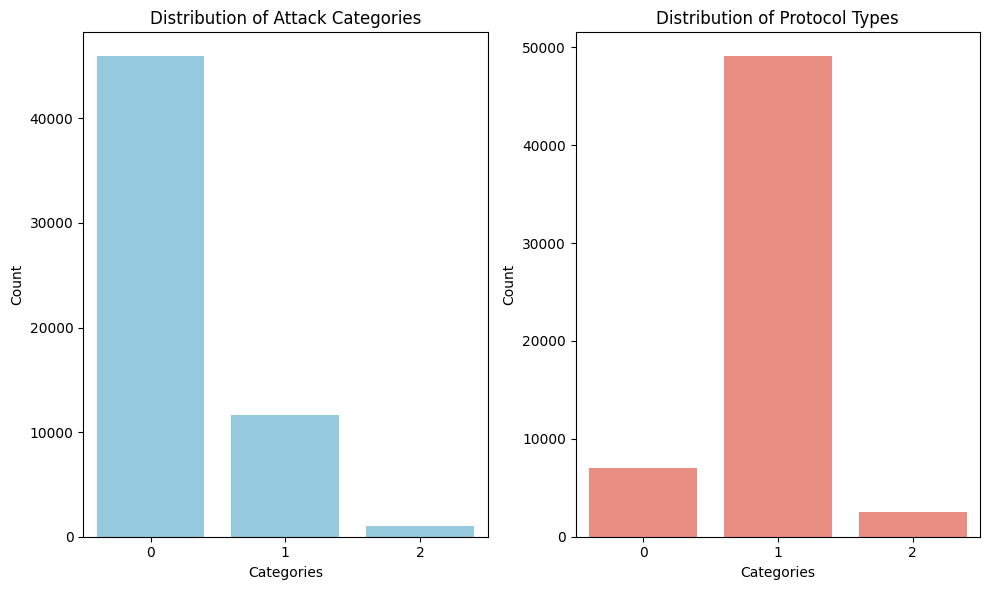

In [26]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Countplot for attack category distribution
sns.countplot(x='attack_category', data=df, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Attack Categories')

# Countplot for protocol type distribution
sns.countplot(x='protocol_type', data=df, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Protocol Types')

# Set common labels
for ax in axes:
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

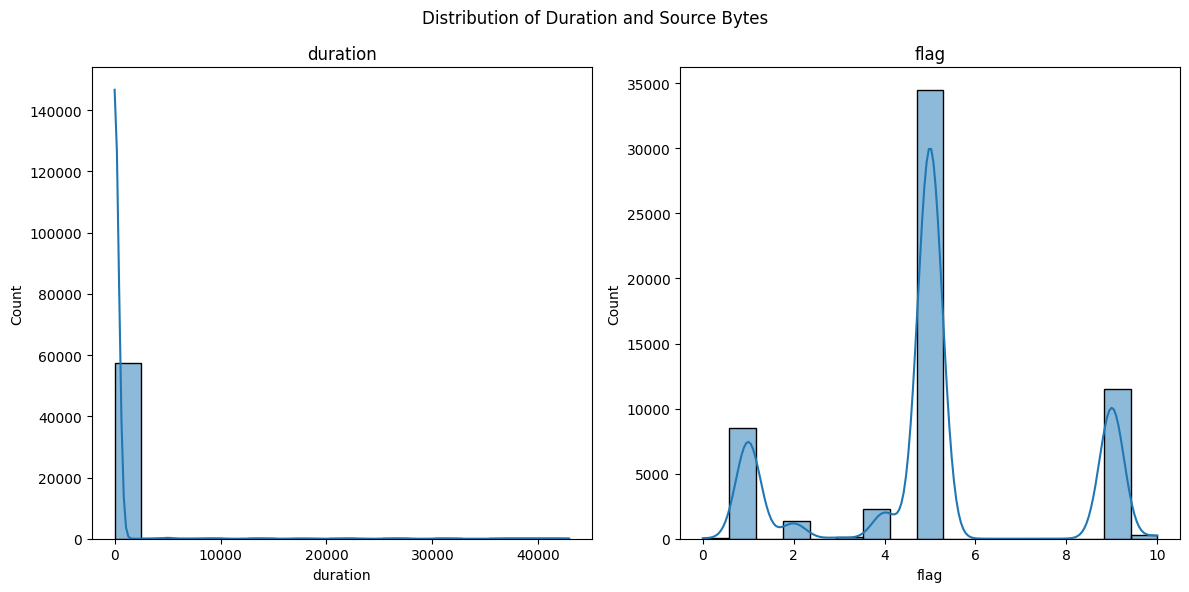

In [27]:
# Define the columns you want to visualize
columns_to_visualize = ['duration', 'flag']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_visualize), figsize=(12, 6))

# Iterate through each column and create a plot
for i, column in enumerate(columns_to_visualize):
    # Plot distribution of the column
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(column)

# Add a title to the overall plot
plt.suptitle("Distribution of Duration and Source Bytes")

# Show the plot
plt.tight_layout()
plt.show()

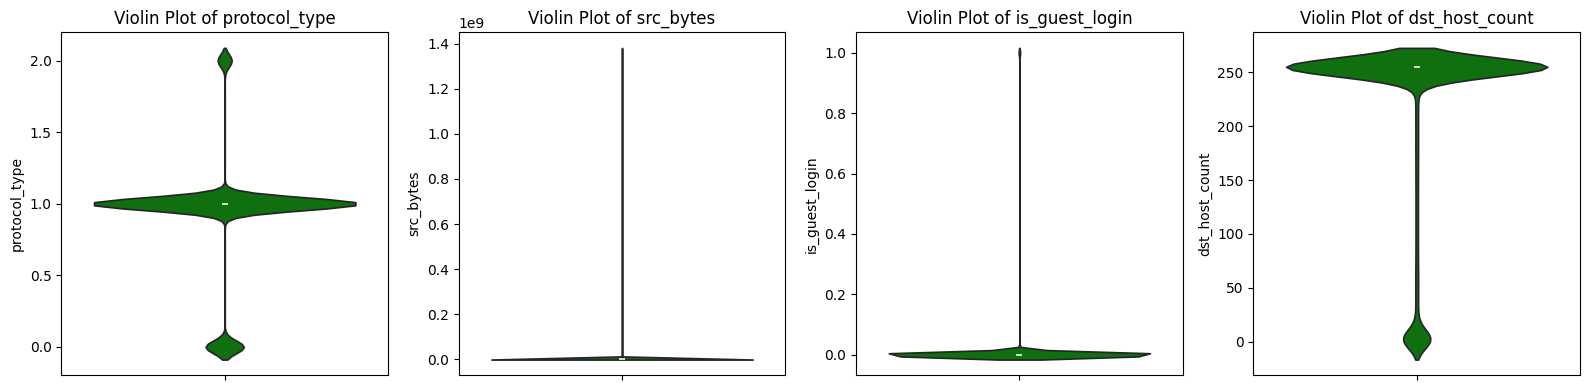

In [28]:
columns_to_plot=['protocol_type','src_bytes','is_guest_login', 'dst_host_count',]

# Create subplots for violin plots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Plot violin plot for each column
for i, column in enumerate(columns_to_plot):
    sns.violinplot(y=df[column], ax=axes[i], color='green')
    axes[i].set_title(f'Violin Plot of {column}')
    axes[i].set_ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

### Apply Birch Algorithm

In [29]:
# Apply Birch clustering algorithm
birch = Birch(threshold=0.5, n_clusters=3)  # You can adjust parameters as needed
birch.fit(attack_category)

Birch()

In [30]:
# Get cluster labels
cluster_labels = birch.labels_

In [31]:
# Add cluster labels to the DataFrame
df['birch_cluster'] = cluster_labels

C:\Users\pc\AppData\Local\Temp\ipykernel_7576\1092387333.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=cluster_labels, palette='viridis')


Text(0, 0.5, 'Count')

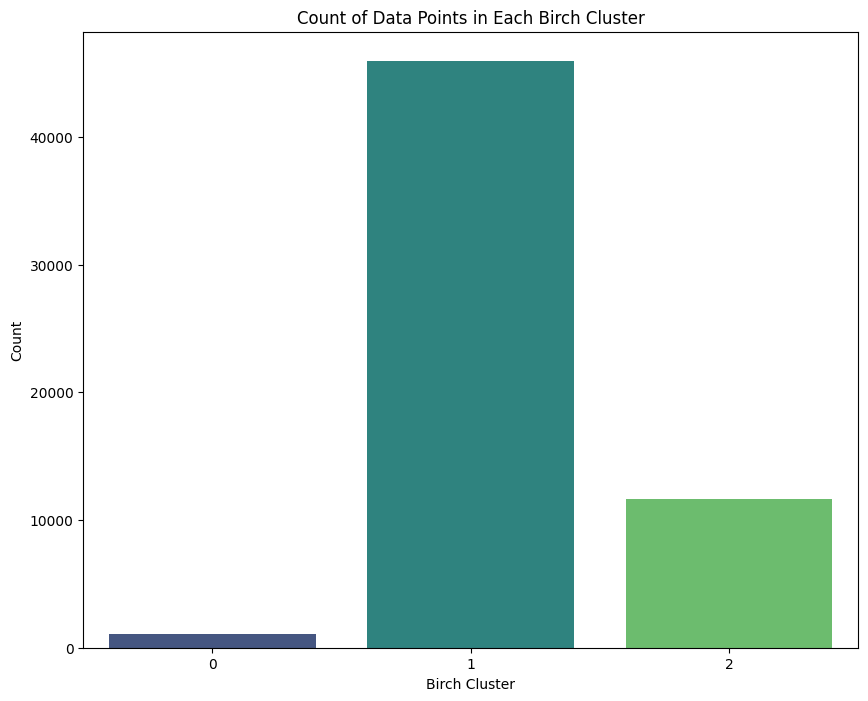

In [32]:
# Plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(x=cluster_labels, palette='viridis')
plt.title('Count of Data Points in Each Birch Cluster')
plt.xlabel('Birch Cluster')
plt.ylabel('Count')

In [33]:
# Add values above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### Train and Test

In [34]:
# Define features and target variable
X = df.drop(['attack_class','attack_category' ,'birch_cluster'], axis=1)  # Excluding the target variable
y = df['birch_cluster']

In [35]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Define input layer
input_layer = Input(shape=(X_train.shape[1],))

In [37]:
# Define fully connected layers
dense1 = Dense(128, activation='relu')(input_layer)
dropout1 = Dropout(0.5)(dense1)
dense2 = Dense(64, activation='relu')(dropout1)
output_layer = Dense(4, activation='softmax')(dense2)  # Output layer for 4 categories

In [38]:
class GCN:
    def __init__(self, state_dim, action_dim, reward_dim, hidden_dim=64):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.reward_dim = reward_dim
        self.hidden_dim = hidden_dim
        self.build_model()

    def build_model(self):
        # Input layers
        state_input = Input(shape=(self.state_dim,), name='state_input')
        reward_input = Input(shape=(self.reward_dim,), name='reward_input')
        action_input = Input(shape=(self.action_dim,), name='action_input')
        next_state_input = Input(shape=(self.state_dim,), name='next_state_input')

        # GCN layer
        concatenated_input = tf.concat([state_input, reward_input, action_input, next_state_input], axis=1)
        hidden_layer = Dense(self.hidden_dim, activation='relu')(concatenated_input)
        output_layer = Dense(self.action_dim, activation='softmax')(hidden_layer)

        # Build model
        self.model = Model(inputs=[state_input, reward_input, action_input, next_state_input], outputs=output_layer)
        self.model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    def train(self, state, reward, action, next_state, target):
        self.model.fit(x=[state, reward, action, next_state], y=target, verbose=0)

    def predict(self, state, reward, action, next_state):
        return self.model.predict([state, reward, action, next_state])

In [39]:
# Build the model
build_model = Model(inputs=input_layer, outputs=output_layer)

In [40]:
build_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
# Print the model summary
build_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 42)]              0         
                                                                 
 dense (Dense)               (None, 128)               5504      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 14020 (54.77 KB)
Trainable params: 14020 (54.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# Train the model
history = build_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10


733/733 [==============================] - 4s 3ms/step - loss: 9190.2549 - accuracy: 0.8536 - val_loss: 12163.0332 - val_accuracy: 0.9322
Epoch 2/10
733/733 [==============================] - 2s 3ms/step - loss: 20716.0293 - accuracy: 0.8997 - val_loss: 6120.0996 - val_accuracy: 0.9519
Epoch 3/10
733/733 [==============================] - 2s 3ms/step - loss: 19403.5020 - accuracy: 0.9119 - val_loss: 963.3468 - val_accuracy: 0.9271
Epoch 4/10
733/733 [==============================] - 2s 3ms/step - loss: 23959.7656 - accuracy: 0.9144 - val_loss: 9330.8057 - val_accuracy: 0.9277
Epoch 5/10
733/733 [==============================] - 2s 3ms/step - loss: 6378.1904 - accuracy: 0.8984 - val_loss: 9686.1260 - val_accuracy: 0.9363
Epoch 6/10
733/733 [==============================] - 2s 3ms/step - loss: 19995.4219 - accuracy: 0.9053 - val_loss: 14428.0713 - val_accuracy: 0.9696
Epoch 7/10
733/733 [==============================] - 2s 3ms/step - loss: 36807.8867 - accuracy: 0.9064 -

In [43]:
# Predictions on training and testing data
train_predictions = build_model.predict(X_train).argmax(axis=1)
test_predictions = build_model.predict(X_test).argmax(axis=1)

367/367 [==============================] - 1s 2ms/step


In [44]:
# Evaluation metrics
accuracy = accuracy_score(y_test, test_predictions)
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions, average='weighted')
recall = recall_score(y_test, test_predictions, average='weighted')
f1 = f1_score(y_test, test_predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, test_predictions)

In [45]:
# Print the evaluation metrics
print("Accuracy:",accuracy)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9775692963752666
Train Accuracy: 0.9789747526441488
Test Accuracy: 0.9775692963752666
Precision: 0.9775370087135311
Recall: 0.9775692963752666
F1 Score: 0.9775246793931835
Confusion Matrix:
[[ 178    9   37]
 [  26 9032   95]
 [   6   90 2252]]


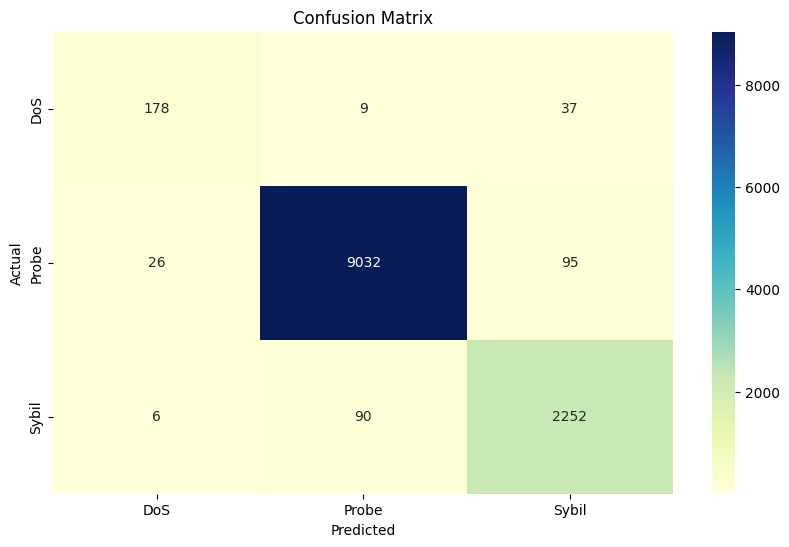

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [47]:
# Evaluation metrics
metrics = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [train_accuracy, test_accuracy, precision, recall, f1]

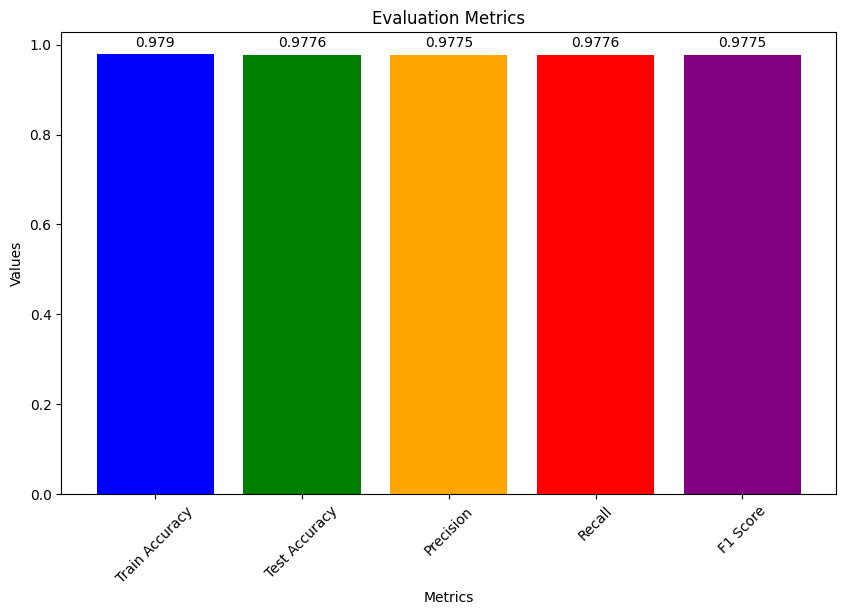

In [48]:
# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)
# Add value labels on top of each bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, round(value, 4), ha='center', va='bottom')

plt.show()
